## 01. Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

## 02. Reading the CSV with Pandas

In [2]:
df = pd.read_csv("GDP_per_capita_usa.csv")
df.head()

,Year,GDP,Per Capita,Growth
0,2021,"$23,315.08B","$70,249",5.95%
1,2020,"$21,060.47B","$63,531",-2.77%
2,2019,"$21,380.98B","$65,120",2.29%
3,2018,"$20,533.06B","$62,823",2.95%
4,2017,"$19,477.34B","$59,908",2.24%


## 03. Data Preprocessing

In [3]:
# Removing the dollar, comma and percentage symbol from the dataframe
df["GDP"] = df["GDP"].str.replace("$", "")
df["GDP"] = df["GDP"].str.replace(",", "")
df["GDP"] = df["GDP"].str.replace("B", "")
df["Per Capita"] = df["Per Capita"].str.replace("$", "")
df["Per Capita"] = df["Per Capita"].str.replace(",", "")
df["Growth"] = df["Growth"].str.replace("%", "")

In [4]:
# Checking the dataframe
df.head()

,Year,GDP,Per Capita,Growth
0,2021,23315.08,70249,5.95
1,2020,21060.47,63531,-2.77
2,2019,21380.98,65120,2.29
3,2018,20533.06,62823,2.95
4,2017,19477.34,59908,2.24


In [5]:
# Checking the datatypes of the columns
df.dtypes

Year           int64
GDP           object
Per Capita    object
Growth        object
dtype: object

In [6]:
# Using a dictionary to change the datatype of columns from object to int and float
dt_convert = {
    "GDP": float,
    "Per Capita": float,
}

In [7]:
# Changing the datatypes of the columns
df = df.astype(dt_convert)
df.dtypes

Year            int64
GDP           float64
Per Capita    float64
Growth         object
dtype: object

In [8]:
# Checking the dataframe
df.head()

,Year,GDP,Per Capita,Growth
0,2021,23315.08,70249.0,5.95
1,2020,21060.47,63531.0,-2.77
2,2019,21380.98,65120.0,2.29
3,2018,20533.06,62823.0,2.95
4,2017,19477.34,59908.0,2.24


In [9]:
# Evaluating the general statistics of the dataframe
df.describe()

,Year,GDP,Per Capita
count,62.000000,62.000000,62.000000
mean,1990.500000,7935.587903,27417.145161
std,18.041619,6738.805659,20172.070442
min,1960.000000,543.300000,3007.000000
25%,1975.250000,1732.027500,7998.750000
50%,1990.500000,6060.635000,24115.500000
75%,2005.750000,13621.492500,45757.250000
max,2021.000000,23315.080000,70249.000000


## 04. Create a Scatterplot between Year and GDP Per Capita

In [10]:
# Selecting independent(x) and dependent variable(y)
# independent variable = Year
# dependent variable = GDP Per Capita (US $)
x = df[["Year"]].values
y = df[["Per Capita"]].values

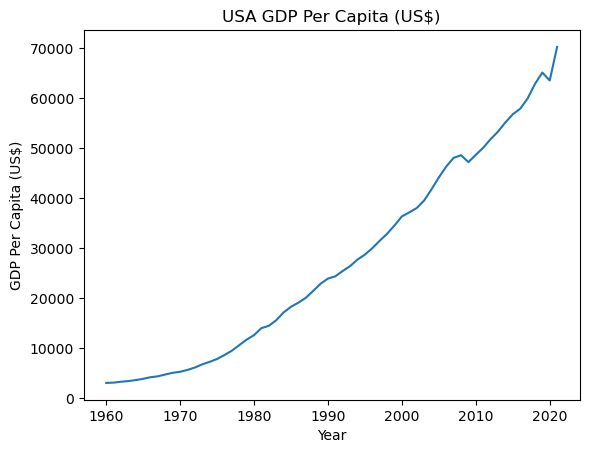

In [11]:
plt.plot(x, y)
plt.title("USA GDP Per Capita (US$)")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita (US$)")
plt.show()

## 05. Creating a Linear Regression Object

In [12]:
lin_reg = linear_model.LinearRegression()

In [13]:
# Training the Linear Regression model
lin_reg.fit(x, y)

LinearRegression()

## 06. Accessing the Slope and Intercept
Linear Equation: <br>
**y = mx + c**<br>
where,<br>
	y = independent variable<br>
    m = slope<br>
    x = dependent variable<br>
    c = intercept<br>

In [14]:
slope = lin_reg.coef_
print("Slope(m):", slope)

Slope(m): [[1099.76930825]]


In [15]:
intercept = lin_reg.intercept_
print("intercept(c):", intercept)

intercept(c): [-2161673.66291456]


## 07. Predicting the GDP of Year 2030, 2040 and 2050

In [16]:
lin_reg.predict([[2030], [2040], [2050]])

array([[70858.03283725],
       [81855.72591977],
       [92853.41900229]])

## Assessing the Accuracy of the Linear Regression Model

In [17]:
# Predicting the GDP of all the years in the dataframe
predicted_gdp = lin_reg.predict(x)

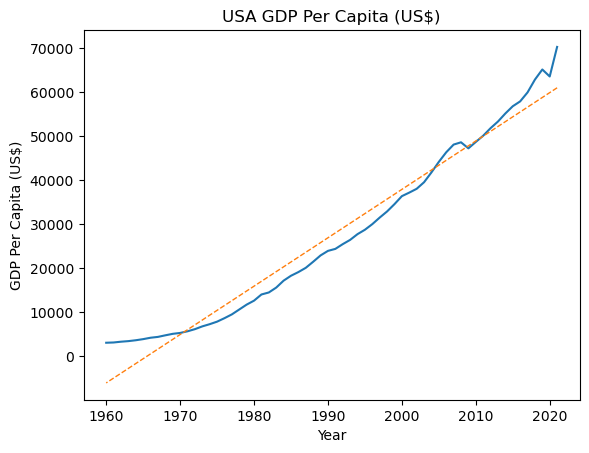

In [18]:
# Plotting the Regression Line
plt.plot(x, y)
plt.plot(x, predicted_gdp, linestyle="--", linewidth=1)
plt.title("USA GDP Per Capita (US$)")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita (US$)")
plt.show()